In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from itertools import product
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading and describing data

df = pd.read_csv('aggregated_df_final.csv')
df.describe(include= 'all')

,time,open_x,high_x,low_x,close_x,Volume_x,Basis_x,RSI_x,MACD_x,OnBalanceVolume_x,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
count,59663,59663.000000,59663.000000,59663.000000,59663.000000,5.966300e+04,59663.000000,59663.000000,59663.000000,5.966300e+04,...,59663.000000,5.966300e+04,59663.000000,59663.000000,59663.000000,48270.000000,48270.000000,48270.000000,48270.000000,48270.000000
unique,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,21-12-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8416.694658,8728.359106,8044.069497,8426.289391,2.201089e+07,8207.775014,22.739820,111.483878,3.514511e+07,...,38.127506,6.641763e+04,0.102670,0.390048,0.096660,0.239693,0.148415,0.332505,0.194324,0.085063
std,NaN,9842.236211,10170.619679,9416.144122,9840.411289,5.605885e+07,9681.575989,12.965205,733.361768,4.634636e+08,...,17.674983,1.124038e+05,0.425099,0.267146,0.233405,0.426901,0.355515,0.471116,0.395683,0.278979
min,NaN,199.250625,234.263125,176.062500,199.313750,1.425675e+01,0.000000,0.000000,-3638.741814,-2.119188e+09,...,18.409581,2.827780e+03,-0.980600,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2322.250000,2373.177500,2262.925000,2322.250000,5.558007e+03,2307.410750,12.452661,-97.217860,-1.896029e+05,...,24.185195,7.073344e+03,-0.140600,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,4470.080625,4634.725405,4330.815236,4479.104375,1.997426e+04,4301.441594,18.867800,18.696826,5.053499e+04,...,27.821708,1.132473e+04,0.000000,0.400000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,9209.375000,9716.875000,8652.012500,9225.620000,3.422973e+06,8859.955000,32.116066,285.342120,5.719739e+05,...,53.963303,1.048936e+05,0.421500,0.550000,0.216667,0.000000,0.000000,1.000000,0.000000,0.000000


In [3]:
# Setting index and extracting relevant features for time series analysis

df = df.set_index('time')
df = df.iloc[:,0:4]

<AxesSubplot:xlabel='time'>

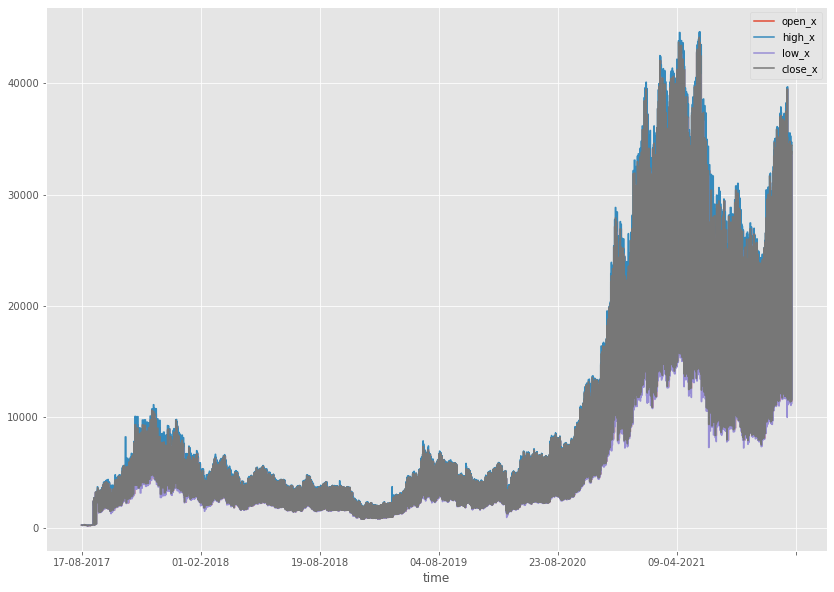

In [4]:
# Plotting movement of OHLC over the period 2017-2021
df.loc[:,df.columns].plot(figsize = (14,10))

In [6]:
# Converting index to datetime format
df.index = pd.to_datetime(df.index)

In [8]:
# Resampling to daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

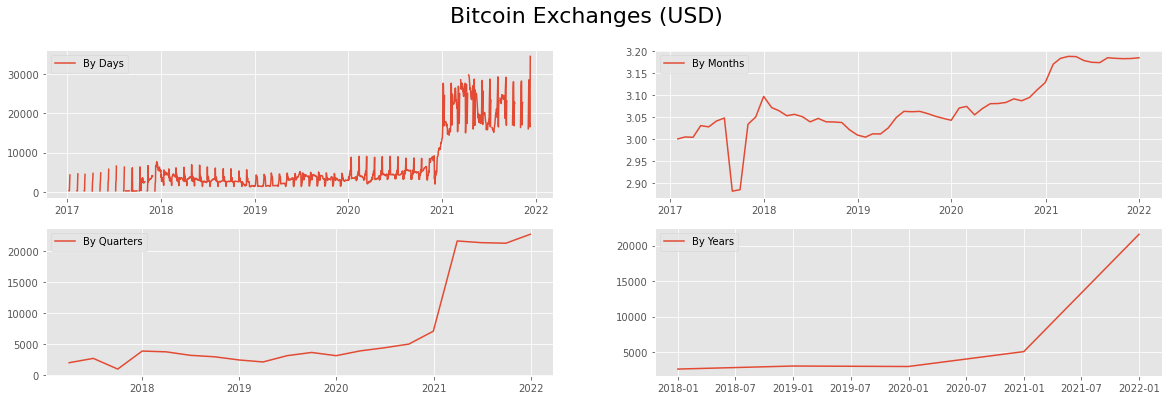

In [27]:
# Plotting subplots of OHLC by days, months, quarters and years
fig = plt.figure(figsize=[20,6])
plt.suptitle('Bitcoin Exchanges (USD)', fontsize=22)

plt.subplot(221)
plt.plot(df.close_x, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.close_x, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.close_x, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.close_x, '-', label='By Years')
plt.legend()

plt.show()

Dickey–Fuller test: p=0.998765


<Figure size 1440x720 with 0 Axes>

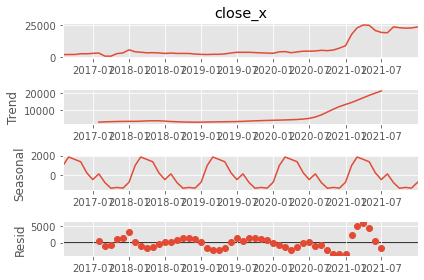

In [11]:
# Checking Stationarity 

plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(df_month.close_x).plot();
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
plt.show()


From the p-value of Dickey-Fuller test, we conclude that the series is not stationary.

Dickey–Fuller test: p=0.775348


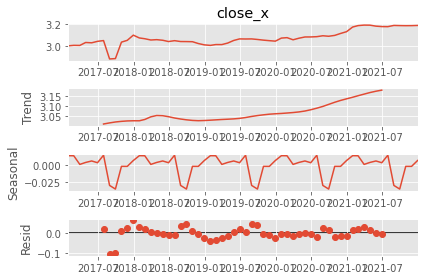

In [12]:
# Box-Cox Transformations

df_month['close_x'], lmbda = stats.boxcox(df_month.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
sm.tsa.seasonal_decompose(df_month.close_x).plot();

Time series data still not stationary

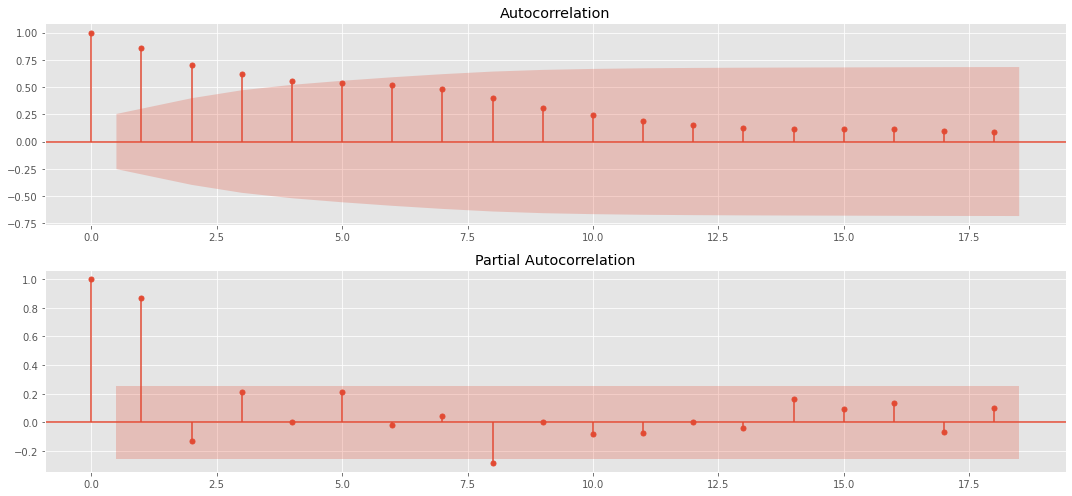

In [39]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.close_x, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.close_x, ax=ax)
plt.tight_layout()
plt.show()

As seen in the preceding figure, the partial autocorrelation only at lag one is statistically significant while for rest the lags it is within the 95% confidence intervals. Hence, for BTC close values the order of AR models is one.

In [14]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [15]:
# Model Selection

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.close_x, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [16]:
results

[[(0, 0, 0, 0), -176.79147841338715],
 [(0, 0, 0, 1), -174.7995953238154],
 [(0, 0, 1, 0), -174.79534331563508],
 [(0, 0, 1, 1), -172.80797675289512],
 [(0, 0, 2, 0), -172.97150279993483],
 [(0, 0, 2, 1), -171.08609500234476],
 [(0, 1, 0, 0), -177.79121238308525],
 [(0, 1, 0, 1), -176.280847768699],
 [(0, 1, 1, 0), -176.19275623011617],
 [(0, 1, 1, 1), -174.34252692411204],
 [(0, 1, 2, 0), -174.25298517919595],
 [(0, 1, 2, 1), -172.3112350174086],
 [(0, 2, 0, 0), -183.8889146441693],
 [(0, 2, 0, 1), -181.9095555321287],
 [(0, 2, 1, 0), -181.90244096383208],
 [(0, 2, 1, 1), -180.0487836840259],
 [(0, 2, 2, 0), -180.29172366835684],
 [(0, 2, 2, 1), -178.54769898874977],
 [(1, 0, 0, 0), -175.97906135294556],
 [(1, 0, 0, 1), -174.00281827203767],
 [(1, 0, 1, 0), -174.00179519501125],
 [(1, 0, 1, 1), -172.0805336668942],
 [(1, 0, 2, 0), -172.08752917689105],
 [(1, 0, 2, 1), -170.17563826784271],
 [(1, 1, 0, 0), -180.80448726368152],
 [(1, 1, 0, 1), -179.00514702420423],
 [(1, 1, 1, 0), -178

In [17]:
# Best Models

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
12  (0, 2, 0, 0) -183.888915
30  (1, 2, 0, 0) -183.387647
48  (2, 2, 0, 0) -182.164288
13  (0, 2, 0, 1) -181.909556
14  (0, 2, 1, 0) -181.902441
                                      SARIMAX Results                                      
Dep. Variable:                             close_x   No. Observations:                   60
Model:             SARIMAX(0, 1, 2)x(0, 1, [], 12)   Log Likelihood                  94.944
Date:                             Mon, 27 Sep 2021   AIC                           -183.889
Time:                                     00:11:02   BIC                           -178.338
Sample:                                 01-31-2017   HQIC                          -181.800
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

Dickey–Fuller test:: p=0.000030


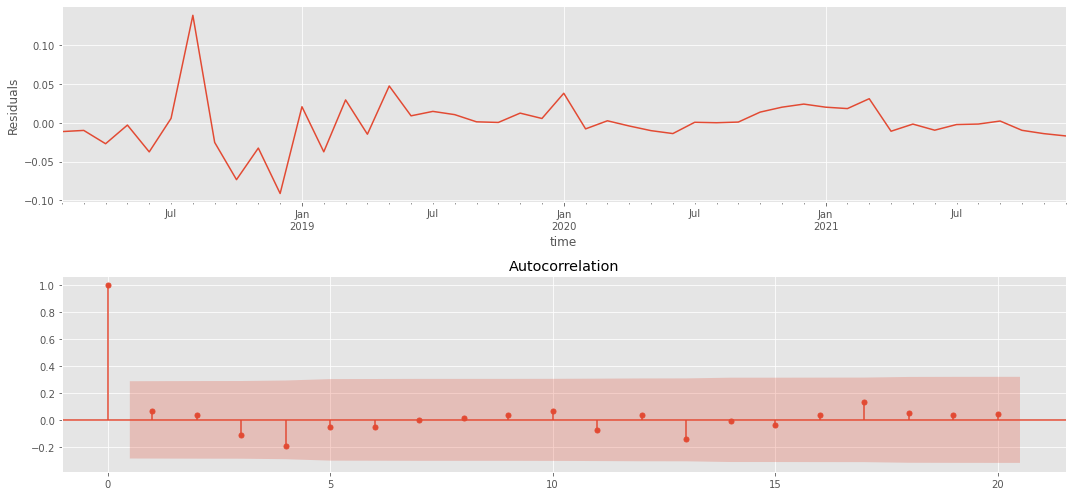

In [18]:
# STL-decomposition

plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

In [19]:
# Inverse Box-Cox Transformation Function

def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

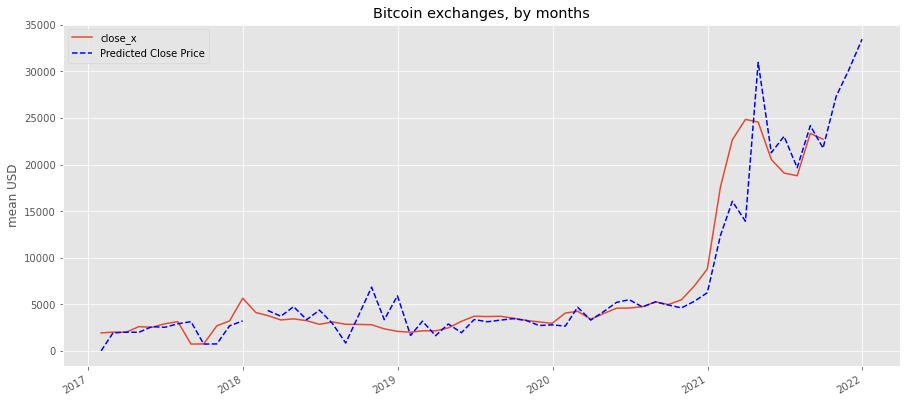

In [20]:
# Prediction

df_month2 = df_month[['close_x']]
df_month2.close_x = df_month2.close_x.apply(lambda x: invboxcox(x, lmbda))
date_list = [datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.close_x.plot()
df_month2.forecast.plot(color='b', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()
